Зчитуємо данні та ділимо коментарі на позитивні/негативні та нейральні:
Оцінка 1, 2 - негативний
3 - нейтральий
4, 5 - позитивний

In [3]:
import pandas as pd

df = pd.read_csv('order_reviews.csv')
df = df[df['review_comment_message'].notna()]
df['review_score'] = df['review_score'].apply(lambda x: 1 if x > 3 else -1 if x < 3 else 0)
df


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,1,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,1,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,1,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,1,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,1,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,1,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,0,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,1,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,-1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Ділимо вибірку на тестову та тренувальну (20%)
Далі векторизуємо коментарі за допомогою TfidfVectorizer, що враховує не лише загальну частоту слів у коментарях, а й інвертовану частоту (кількість коментарів / кількість коментарів, що містять певне слово)
Такий підхід менше буде сильнішим за звчайний частотний.

In [47]:
train, test = train_test_split(df, test_size=0.2)

idf = TfidfVectorizer(ngram_range=(1,1))
train_idf = idf.fit_transform(train['review_comment_message'])
test_idf = idf.transform(test['review_comment_message'])

Далі позитивність/негативність коментаря визначається за допомогою Логістичної регрессії для 3 класів.
Модель для кожного слова знаходить відповідні ваги, що впливають на "позитивність" слова в коментарі.

In [48]:
model = LogisticRegression(n_jobs = -1)

model.fit(train_idf, train['review_score'])
predict = model.predict_proba(test_idf)

Обрахована таблиця вагів

In [49]:
weights = pd.DataFrame({'words': idf.get_feature_names_out(),
                        'weights_positive': model.coef_[2].flatten(),
                        'weights_negative': model.coef_[0].flatten(),
                        'weights_neutral': model.coef_[1].flatten()})
weights

,words,weights_positive,weights_negative,weights_neutral
0,00,-0.873254,0.376847,0.496407
1,000,0.199978,-0.095326,-0.104653
2,0000000000000000000000000,-0.097048,0.121708,-0.024660
3,000000995,-0.011443,0.021903,-0.010460
4,000024453,0.215488,-0.161699,-0.053790
...,...,...,...,...
14517,único,1.148694,-1.598194,0.449501
14518,únicos,0.076686,-0.014253,-0.062432
14519,úteis,0.195466,-0.048400,-0.147066
14520,útil,-0.428948,-0.144337,0.573285


Для кожного класу (негативний, позитивний, нейтральний) було візуалізовано топ 100 слів, що зустрічаються у коментарях цього класу
Шрифт тексту відповідає розміру вагам.
Червоий - негативний
Синій - позитивний
Зелений - нейтральний

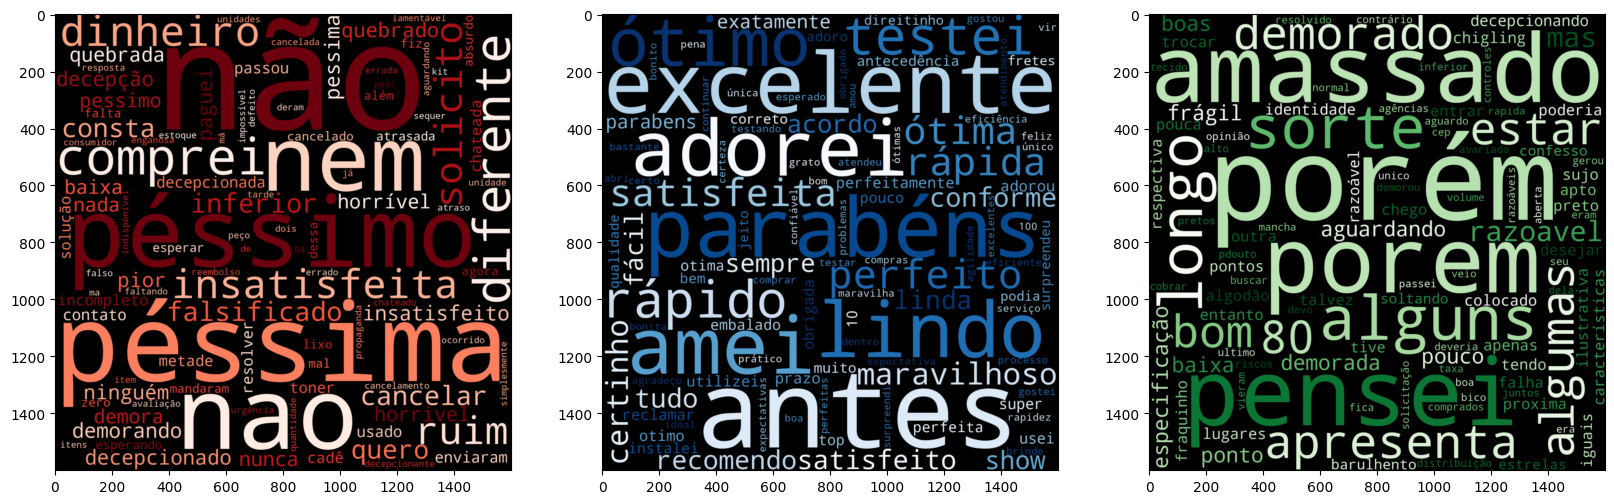

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

weights_negative = weights[['words', 'weights_negative']].sort_values(by= 'weights_negative', ascending = False)[:100]
weights_positive = weights[['words', 'weights_positive']].sort_values(by= 'weights_positive', ascending = False)[:100]
weights_neutral = weights[['words', 'weights_neutral']].sort_values(by= 'weights_neutral', ascending = False)[:100]

wc_negative = WordCloud(background_color="black",
                        colormap = 'Reds',
                        max_words=100,
                        width=1600,
                        height=1600)\
                        .generate_from_frequencies(dict(weights_negative.values))

wc_positive = WordCloud(background_color="black",
                        colormap = 'Blues',
                        max_words=100,
                        width=1600,
                        height=1600)\
                        .generate_from_frequencies(dict(weights_positive.values))

wc_neutral = WordCloud(background_color="black",
                        colormap = 'Greens',
                        max_words=100,
                        width=1600,
                        height=1600)\
                        .generate_from_frequencies(dict(weights_neutral.values))

fig, ax = plt.subplots(1, 3, figsize = (20, 12))
ax[0].imshow(wc_negative, interpolation='bilinear')
ax[1].imshow(wc_positive, interpolation='bilinear')
ax[2].imshow(wc_neutral, interpolation='bilinear')

plt.show()

Зображені графіки ROC - кривих для приналежності кожному з класів

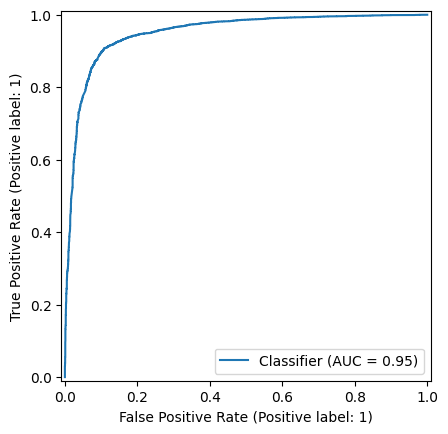

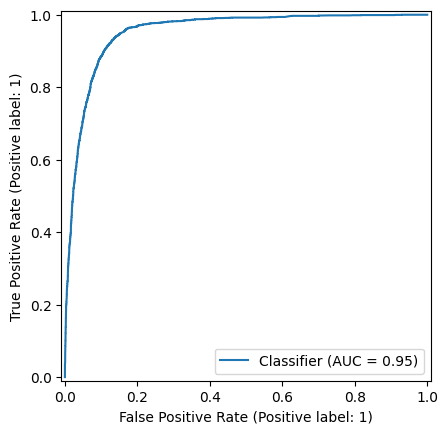

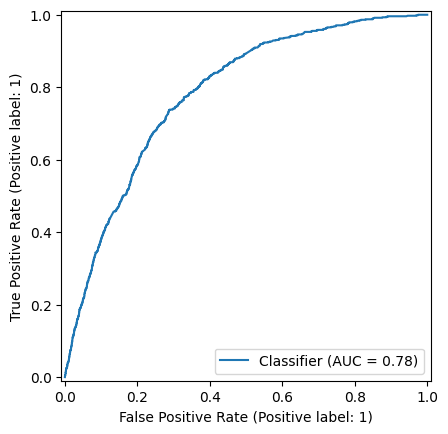

In [91]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(test['review_score'] == 1, predict[:, 2])
RocCurveDisplay.from_predictions(test['review_score'] == -1, predict[:, 0])
RocCurveDisplay.from_predictions(test['review_score'] == 0, predict[:, 1])

Матриця плутанини для оцінки якості класифікатора, а також відповідні метрики.
Як ми бачимо, класифікатор добре розпізнає позитивні й негативні коментарі, проте погано нейтральні.
Це спричинено тим, що по-перше класи незбалансовані, а по-друге емоційне забарвлення коментаря важко визначити на підставі оцінки

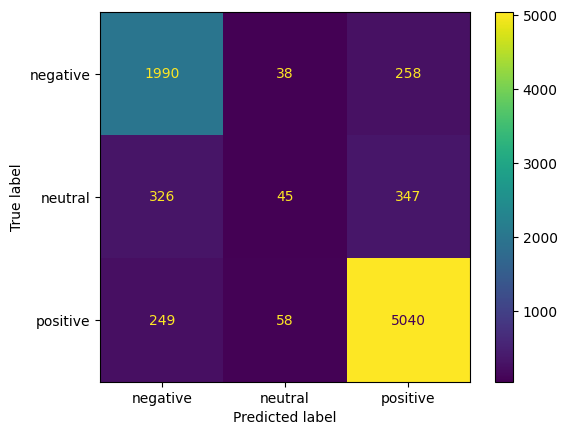

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

predict_int = model.predict(test_idf)
cm = confusion_matrix(test['review_score'], predict_int)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
cm_display.plot()


In [105]:
rep = classification_report(test['review_score'], predict_int)
print(rep)

              precision    recall  f1-score   support

          -1       0.78      0.87      0.82      2286
           0       0.32      0.06      0.10       718
           1       0.89      0.94      0.92      5347

    accuracy                           0.85      8351
   macro avg       0.66      0.63      0.61      8351
weighted avg       0.81      0.85      0.82      8351



Для знаходження числових значень цін з коментарів було використано регулярні вирази.
Усі ціни в комантарях були зазначені у форматі числа (можливо з 2 знаками після коми/крапки) де спереду аба ззаду через пробіл або без нього позначалася валюта (Доллар США \$ або Бразильський доллар R$)

In [57]:
import re

price_patterns = [
        r'R?\$\s?(\d+(\.|\,\d{1,2})?)',
        r'(\d+(\.|\,\d{1,2})?)\s?R?\$',
    ]

def find_price(comment):
    res = []
    for patt in price_patterns:
        matches =  re.findall(patt, comment)
        for match in matches:
            res.append(match[0])
    if len(res) == 0:
        return None
    return res

df['prices'] = df['review_comment_message'].apply(find_price)
df_prices = df[df['prices'].notna()]
df_prices = df_prices[['review_comment_message', 'prices']]
pd.set_option('display.max_colwidth', 1000)
df_prices

,review_comment_message,prices
115,"Este foi o pedido\r\nBalde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)\r\nVendido e entregue targaryen\r\nTapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG","[25,00, 35,90]"
1410,Eu recebi desta loja apenas dois pendentes. Paguei o boleto antecipado e um produto não veio: Trata-se de um Pendente Em Alumínio Meia Bola Medio Escovado no valor de R$ 90 . Quero $ de volta.,[90]
2509,"Comprei 4 produtos, sendo que só recebi 3. Faltou um lençol branco sem elástico. Foi quase R$ 100,00. E como eu fico? No prejuizo?","[100,00]"
5763,"Relógio belíssimo, muito elegante, inacreditável diante do valor de menos de R$ 150,00! Veio muito bem embrulhado e protegido, fora que tem também caixa muito chique, como se fosse jóia!!! Recomendo","[150,00]"
9084,"Comprei dois fones de ouvido com valor de R$ 50, 32 e entregaram o cabo para para iPhone no valor de r$ 10","[50, 10]"
15472,"Entrega super rápida. Quanto ao produto, não gostei tanto, imaginei que seria melhor e mais bonito, se tivesse visto em uma loja, pegado em mãos antes não teria pagado R$21,90 não, mas ok.","[21,90]"
18897,"Pedi HD 500 GB SATA Notebook Samsung R520\r\n\r\n1 unidade - R$ 269,00 cada\r\n\r\n \r\nE recebi Hdd 2,5 Notebook / Desktop Seagate St500lm030 Barracuda 500gb 5400rpm 128mb Sata 6gb/s","[269,00]"
19262,"O tipo de envio ""PAC"" dos correios demora muito , como geralmente a peça de carro e necessária com uma certa urgência deveria ter a opção de sedex. Prefiro pagar R$ 20 a mais no frete e receber logo",[20]
20227,"O produto custou R$34 com frete, mas não é bom. É bem ralinho parece água.",[34]
21023,"Pagamos caro para receber em casa (frete de R$95,00) e ainda não recebi o produto, não consigo retirar nos correios pois não deixaram o papel de retirada na minha casa. INSATISFEITA!!!!!","[95,00]"


Відповідний код для класифікації коментаря та виділення ціни з нього

In [55]:
comment = 'Carteira maior do que as grandes normal muito feia$60 perdido.'

print(comment)

pred = model.predict(idf.transform([comment]))
if pred == -1:
    print('negative')
elif pred == 1:
    print('positive')
else:
    print('neutral')

print('prices:', find_price(comment))

Carteira maior do que as grandes normal muito feia$60 perdido.
positive
prices: ['60']
